<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [15]:
# Paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.cluster import KMeans

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
# Cargar el archivo
df = pd.read_csv("https://raw.githubusercontent.com/niconlvs/ModelosML/refs/heads/main/transacciones.csv")
df.head()

,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate
0,14.09,Debit,San Diego,D000380,M015,ATM,70,Doctor,81,1,5112.21,16,1,11,4,2024-11-04 08:08:08
1,376.24,Debit,Houston,D000051,M052,ATM,68,Doctor,141,1,13758.91,16,1,27,6,2024-11-04 08:09:35
2,126.29,Debit,Mesa,D000235,M009,Online,19,Student,56,1,1122.35,18,0,10,7,2024-11-04 08:07:04
3,184.50,Debit,Raleigh,D000187,M002,Online,26,Student,25,1,8569.06,16,4,5,5,2024-11-04 08:09:06
4,13.45,Credit,Atlanta,D000308,M091,Online,26,Student,198,1,7429.40,17,0,16,10,2024-11-04 08:06:39


A continuación se detallan las variables seleccionadas del conjunto de datos, considerando su relevancia para el análisis de **agrupamiento de transacciones**. Estas variables aportan información sobre el comportamiento, contexto y características de cada transacción, facilitando la detección de patrones o segmentos de interés.

| 🏷️ Columna | 📖 Descripción |
|------------|----------------|
| **TransactionAmount** | Valor monetario de la transacción. Ayuda a identificar comportamientos de gasto. |
| **TransactionType** | Tipo de transacción, ya sea 'Credit' o 'Debit'. Permite distinguir el flujo de dinero. |
| **Location** | Ciudad en EE. UU. donde ocurrió la transacción. Útil para agrupar por comportamiento geográfico. |
| **DeviceID** | Identificador del dispositivo usado. Aporta trazabilidad y puede reflejar hábitos tecnológicos. |
| **MerchantID** | ID único del comerciante involucrado. Permite analizar relaciones comerciales o preferencias. |
| **Channel** | Canal de la transacción (Online, ATM, Sucursal). Importante para segmentar por modo de operación. |
| **CustomerAge** | Edad del cliente. Relevante para segmentación demográfica. |
| **CustomerOccupation** | Ocupación del cliente. Puede influir en patrones de consumo. |
| **TransactionDuration** | Duración de la transacción. Puede reflejar eficiencia o anomalías. |
| **LoginAttempts** | Número de intentos de inicio de sesión previos. Útil para detectar comportamientos inusuales. |
| **AccountBalance** | Saldo de la cuenta al momento de la transacción. Ayuda a comprender la capacidad financiera. |
| **TransactionHour** | Hora en la que se realizó la transacción. Permite detectar hábitos temporales. |
| **TransactionWeekday** | Día de la semana. Puede revelar tendencias según el calendario semanal. |
| **TransactionDay** | Día del mes. Útil para identificar patrones cíclicos dentro del mes. |
| **TransactionMonth** | Mes en que ocurrió la transacción. Ayuda a identificar estacionalidades. |
| **PreviousTransactionDate** | Fecha de la transacción anterior del mismo cliente. Útil para medir frecuencia. |



In [4]:
# 📊 Exploración inicial del DataFrame

print("🔹 Dimensión del DataFrame:", df.shape)

print("\n🔹 Tipos de Datos por Columna:\n")
print(df.dtypes)

print("\n🔹 Valores Nulos por Columna:\n")
print(df.isnull().sum())

print("\n🔹 Primeras Filas del DataFrame:\n")
print(df.head())

print("\n🔹 Estadísticos Descriptivos:\n")
print(df.describe())


🔹 Dimensión del DataFrame: (2512, 16)

🔹 Tipos de Datos por Columna:

TransactionAmount          float64
TransactionType             object
Location                    object
DeviceID                    object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
TransactionHour              int64
TransactionWeekday           int64
TransactionDay               int64
TransactionMonth             int64
PreviousTransactionDate     object
dtype: object

🔹 Valores Nulos por Columna:

TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
Transa

In [5]:
# Definir las columnas a usar
numeric_cols = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance',
    'TransactionHour',
    'TransactionWeekday',
    'TransactionDay',
    'TransactionMonth'
    ]

cat_cols = [
    'TransactionType',
    'Channel',
    'CustomerOccupation'
    ]

total_cols=numeric_cols+cat_cols

<ipython-input-10-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-10-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
<ipython-input-10-5c6cfc839a8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')


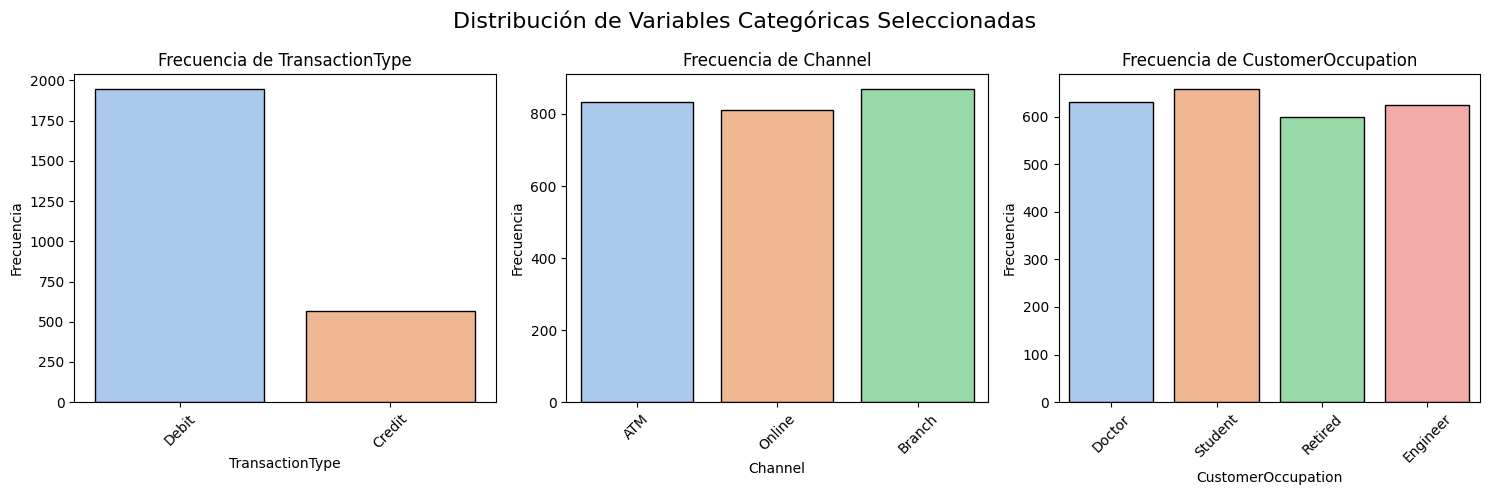

In [10]:
# Crear subplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

plt.suptitle("Distribución de Variables Categóricas Seleccionadas", fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
# Escalar columnas numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_cols])

# Codificar variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_cat_encoded = encoder.fit_transform(df[cat_cols])

# Crear nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_names, index=df.index)

# Combinar numéricas escaladas + categóricas codificadas
X_final = np.hstack([X_num_scaled, X_cat_encoded])

# DataFrame final para explorar visualmente
df_cluster_ready = pd.DataFrame(X_final, columns=[*numeric_cols, *encoded_cat_names])

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


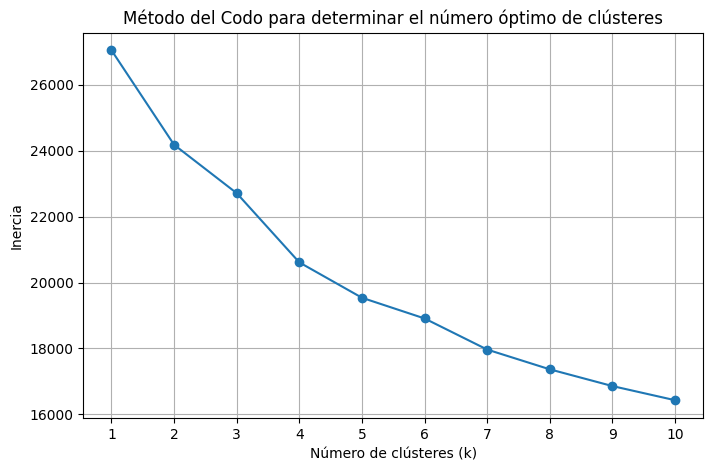

In [16]:
# Determinar el número óptimo de clústeres usando el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_final)
    inertia.append(kmeans.inertia_)

# Graficar la inercia frente al número de clústeres
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para determinar el número óptimo de clústeres")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

Observando la gráfica del método del codo, se aprecia que la inercia disminuye significativamente entre los valores de k=1 a k=4, y luego continúa descendiendo de manera más gradual. A partir de k=7, la reducción de la inercia ya no es tan notoria, lo que indica que agregar más clústeres no mejora sustancialmente la agrupación. Por esta razón, seleccioné 7 clústeres como el número óptimo, ya que representa un equilibrio entre precisión y simplicidad del modelo.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [17]:
# Entrenar KMeans con k=7
kmeans_final = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_final)

# Agregar los grupos al dataframe original
df['Cluster'] = clusters


In [20]:
df['Cluster'].value_counts()

,count
Cluster,
4,535
2,496
1,483
6,359
0,337
3,207
5,95


In [21]:
df.groupby('Cluster')[numeric_cols].mean()


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
0,237.637478,43.795252,113.928783,1.005935,4336.869585,17.949555,1.436202,15.916914,7.115727
1,262.941905,27.501035,128.503106,1.008282,2108.361946,16.374741,0.403727,16.689441,5.844720
2,228.475746,49.225806,122.683468,1.014113,10517.581149,16.500000,1.225806,15.195565,6.262097
3,994.861063,45.396135,119.917874,1.019324,5028.621691,16.516908,1.623188,16.719807,7.231884
4,219.774262,64.435514,119.132710,1.009346,4466.085234,16.351402,1.242991,15.816822,6.413084
5,276.324316,44.536842,131.884211,4.010526,5461.643053,16.684211,1.600000,13.642105,6.494737
6,215.544708,32.484680,106.250696,1.013928,3346.541922,16.353760,3.337047,15.534819,7.278552


In [24]:
# Mínimos y máximos por grupo
group_min = df.groupby('Cluster')[numeric_cols].min()
group_max = df.groupby('Cluster')[numeric_cols].max()

print("\nMínimos por grupo:")
display(group_min)

print("\nMáximos por grupo:")
display(group_max)



Mínimos por grupo:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
0,1.87,18,10,1,105.01,17,0,1,1
1,0.86,18,10,1,101.25,16,0,1,1
2,0.45,26,11,1,5184.13,16,0,1,1
3,541.52,18,10,1,125.85,16,0,1,1
4,0.84,46,10,1,120.89,16,0,1,1
5,1.93,18,11,3,271.78,16,0,1,1
6,0.26,18,10,1,106.86,16,1,1,1



Máximos por grupo:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth
Cluster,,,,,,,,,
0,880.04,80,300,2,13265.92,18,4,31,12
1,877.81,54,299,2,9379.53,18,3,31,12
2,839.33,70,299,2,14977.99,18,4,31,12
3,1919.11,80,300,2,14881.77,18,4,31,12
4,845.14,80,293,2,7996.70,17,4,31,12
5,1531.31,80,291,5,14851.28,18,4,31,12
6,819.48,66,298,2,9962.50,17,4,31,12


In [25]:
# Mostrar 3 ejemplos aleatorios por grupo
print("\nEjemplos de cada grupo:")
for cluster_id in range(7):
    print(f"\nCluster {cluster_id}:")
    display(df[df['Cluster'] == cluster_id].sample(3, random_state=cluster_id))



Ejemplos de cada grupo:

Cluster 0:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
424,119.72,Debit,Tucson,D000445,M011,Branch,30,Engineer,123,1,3435.34,18,4,3,2,2024-11-04 08:10:20,0
405,212.74,Debit,Seattle,D000110,M050,Branch,27,Engineer,128,1,7645.47,18,3,14,12,2024-11-04 08:07:49,0
2052,183.22,Debit,Milwaukee,D000290,M099,ATM,27,Student,63,1,1024.42,18,3,5,10,2024-11-04 08:07:27,0



Cluster 1:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
137,336.39,Debit,San Antonio,D000426,M003,Branch,21,Student,18,1,1000.46,16,0,16,1,2024-11-04 08:09:57,1
1297,547.98,Debit,Oklahoma City,D000218,M070,ATM,28,Student,171,1,1358.54,17,1,24,10,2024-11-04 08:09:19,1
965,477.07,Debit,Columbus,D000503,M096,Online,27,Engineer,278,1,6568.07,16,0,27,11,2024-11-04 08:07:34,1



Cluster 2:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
1929,114.03,Debit,Portland,D000010,M081,ATM,51,Doctor,172,1,13388.56,16,4,24,11,2024-11-04 08:11:42,2
1392,5.29,Credit,San Francisco,D000121,M008,Online,32,Doctor,132,1,12896.68,18,0,13,3,2024-11-04 08:11:04,2
1918,79.33,Credit,Las Vegas,D000154,M026,Online,51,Doctor,109,1,14798.10,16,2,6,12,2024-11-04 08:07:06,2



Cluster 3:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
2149,1250.94,Debit,Columbus,D000282,M054,ATM,36,Doctor,107,2,11565.97,17,1,28,2,2024-11-04 08:08:33,3
1967,1001.83,Debit,Philadelphia,D000220,M051,Online,31,Doctor,55,1,9733.83,17,0,17,7,2024-11-04 08:11:43,3
1517,736.53,Debit,Philadelphia,D000548,M065,ATM,55,Engineer,120,1,9826.26,17,2,10,5,2024-11-04 08:09:38,3



Cluster 4:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
1193,138.82,Debit,Fort Worth,D000493,M030,Online,77,Retired,53,1,3100.22,16,0,16,10,2024-11-04 08:11:48,4
982,453.49,Debit,Seattle,D000471,M088,Branch,66,Doctor,147,1,6366.43,16,0,2,1,2024-11-04 08:08:56,4
1418,7.38,Debit,Houston,D000011,M076,Online,67,Retired,105,1,2923.83,16,2,15,3,2024-11-04 08:10:18,4



Cluster 5:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
932,76.51,Credit,Mesa,D000242,M016,Online,49,Engineer,120,4,9475.40,16,0,3,4,2024-11-04 08:07:51,5
916,337.73,Debit,San Antonio,D000480,M065,Online,78,Retired,107,4,7001.20,17,1,23,5,2024-11-04 08:07:28,5
1254,142.19,Debit,Houston,D000416,M005,Branch,18,Student,27,4,524.46,18,3,15,6,2024-11-04 08:09:44,5



Cluster 6:


,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionWeekday,TransactionDay,TransactionMonth,PreviousTransactionDate,Cluster
747,389.63,Debit,Mesa,D000645,M100,Online,27,Engineer,99,1,9748.48,16,3,16,2,2024-11-04 08:08:55,6
617,115.11,Debit,Albuquerque,D000632,M011,Online,28,Engineer,139,1,9808.97,17,4,5,5,2024-11-04 08:10:18,6
1691,207.71,Credit,Kansas City,D000377,M066,Online,25,Student,63,1,570.10,17,3,16,11,2024-11-04 08:10:55,6


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

### Cluster 0 - Jóvenes Profesionales Estables
**Características principales:**
- Edad media: 43 años
- Balance promedio: ~$4,300
- Canal frecuente: Sucursal o ATM
- Horario de transacción: Tarde (17-18h)
- Bajo número de intentos de login

**Ejemplo:** Ingenieros y empleados con edad media, transacciones frecuentes en sucursal con montos moderados.

---

### Cluster 1 - Jóvenes de Bajo Balance
**Características principales:**
- Edad promedio: 27 años
- Balance promedio: ~$2,100
- Canal frecuente: ATM y Online
- Bajo login, transacciones frecuentes
- Uso de crédito en jóvenes estudiantes y empleados

**Ejemplo:** Jóvenes estudiantes o profesionales con bajo poder adquisitivo, pero actividad constante.

---

### Cluster 2 - Profesionales con Altos Fondos
**Características principales:**
- Edad promedio: 49 años
- Balance promedio: ~$10,500
- Canal frecuente: Online
- Clientes maduros (profesionales, médicos), alta disponibilidad de fondos

**Ejemplo:** Médicos y profesionales mayores con uso frecuente de banca online.

---

### Cluster 3 - Transacciones de Alto Valor
**Características principales:**
- Monto promedio: ~$995 (el más alto)
- Balance promedio: ~$5,000
- Canal: Online y ATM
- Usuarios frecuentes con edad media y montos altos

**Ejemplo:** Transacciones muy grandes, posiblemente compras de alto valor o clientes premium.

---

### Cluster 4 - Adultos Mayores Conservadores
**Características principales:**
- Edad promedio: 64 años (la más alta)
- Balance: ~$4,400
- Canal principal: Online y sucursal
- Monto de transacción bajo pero constante

**Ejemplo:** Jubilados con manejo digital o presencial, balances moderados y actividad ordenada.

---

### Cluster 5 - Clientes con Problemas de Acceso
**Características principales:**
- LoginAttempts promedio: 4 (muy alto)
- Edad promedio: 44 años
- Transacciones: valores medios
- Canal frecuente: Online
- Posibles problemas de autenticación o robo de cuentas

**Ejemplo:** Usuarios con múltiples intentos de acceso por olvido de clave o sospecha de fraude.

---

### Cluster 6 - Transacciones Frecuentes entre Jóvenes
**Características principales:**
- Edad promedio: 32 años
- Alta frecuencia: alto TransactionWeekday (~3.3)
- Bajo monto y duración
- Canal frecuente: Online y ATM
- Balance promedio: ~$3,300

**Ejemplo:** Jóvenes con múltiples transacciones pequeñas a lo largo de la semana. Uso activo de banca móvil.

---


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>